In [ ]:
#import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#dataset

In [ ]:
from keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


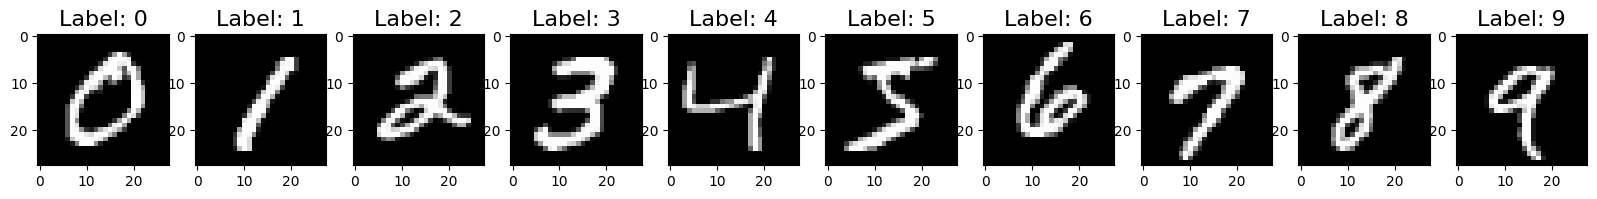

In [ ]:
num_classes = 10
f , ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample,cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 16)



In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#prepare data

In [ ]:
#normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#reshape
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
x_train.shape
x_test.shape

(10000, 784)

In [ ]:
# nueral network

In [ ]:
model = Sequential()
model.add(Dense(units = 128, input_shape=(784,),activation='relu'))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 5120
epochs = 1000
model.fit(x = x_train, y = y_train,batch_size = batch_size,epochs=epochs)

Epoch 1/1000
12/12 [==============================] - 0s 19ms/step - loss: 0.0461 - accuracy: 0.9860
Epoch 2/1000
12/12 [==============================] - 0s 14ms/step - loss: 0.0445 - accuracy: 0.9866
Epoch 3/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0431 - accuracy: 0.9872
Epoch 4/1000
12/12 [==============================] - 0s 21ms/step - loss: 0.0434 - accuracy: 0.9875
Epoch 5/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.0428 - accuracy: 0.9873
Epoch 6/1000
12/12 [==============================] - 0s 13ms/step - loss: 0.0430 - accuracy: 0.9876
Epoch 7/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0432 - accuracy: 0.9870
Epoch 8/1000
12/12 [==============================] - 0s 15ms/step - loss: 0.0427 - accuracy: 0.9873
Epoch 9/1000
12/12 [==============================] - 0s 12ms/step - loss: 0.0420 - accuracy: 0.9874
Epoch 10/1000
12/12 [==============================] - 0s 11ms/step - loss: 0.0425 - accura

In [ ]:
test_loss , test_acc = model.evaluate(x_test,y_test)
print("Test Loss: {} , Test accuracy: {} ".format(test_loss,test_acc) )

313/313 [==============================] - 1s 2ms/step - loss: 0.1369 - accuracy: 0.9775
Test Loss: 0.13687609136104584 , Test accuracy: 0.9775000214576721 


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[5.90379648e-17 1.89179225e-13 1.98557100e-13 ... 1.00000000e+00
  8.12971718e-18 3.83087473e-09]
 [1.23235281e-19 1.53871534e-12 1.00000000e+00 ... 3.79304397e-21
  4.66708632e-15 5.48646824e-32]
 [5.67948561e-17 9.99999523e-01 1.17256116e-08 ... 2.98496801e-08
  2.87620452e-07 2.93465983e-14]
 ...
 [2.67014275e-30 2.54017108e-16 1.02902449e-28 ... 2.82624809e-11
  2.58912927e-13 6.28922137e-10]
 [3.24693255e-24 4.36674171e-17 1.84495131e-31 ... 9.56097903e-23
  8.10029543e-10 1.75731236e-15]
 [1.13748514e-20 8.16362678e-17 2.71760780e-15 ... 9.31508391e-32
  8.19929082e-19 1.92313927e-27]]
[7 2 1 ... 4 5 6]


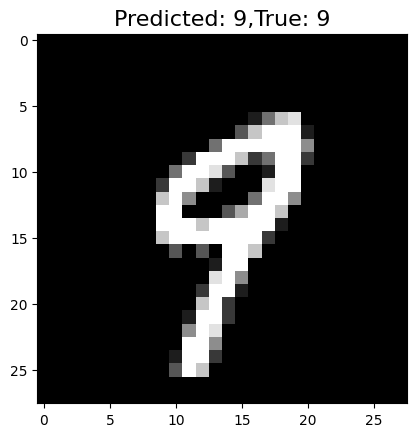

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test,axis =1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {},True: {}".format(y_sample_pred_class,y_sample_true),fontsize = 16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')